In [27]:
from torch.utils.data import DataLoader
import torchvision
import torchvision.transforms as transforms
import os
import numpy as np
import matplotlib.pyplot as plt


In [28]:

def load_images_and_extract_patches(folder_path, patch_size):
  """
  Loads images from a folder, extracts their names and patches, and returns them.

  Args:
      folder_path: Path to the folder containing images.
      patch_size: The size of each patch (height, width).

  Returns:
      A tuple containing:
          - A dictionary where keys are image filenames and values are lists of extracted patches.
          - A list of image filenames.
  """

  # Define transformations (adjust as needed)
  transform = transforms.Compose([
      transforms.ToTensor(),
      transforms.Resize((224,224))  # Normalize pixel values
  ])

  # Create a dataset for the folder
  dataset = torchvision.datasets.ImageFolder(folder_path, transform=transform)

  # Create a DataLoader to iterate over the dataset
  data_loader = DataLoader(dataset, batch_size=1, shuffle=False)  # Batch size of 1 for individual images

  all_patches = {}
  image_names = []

  # Loop through each image in the DataLoader
  for (image, label), index in zip(data_loader, range(len(dataset))):
    # Extract image name from dataset
    image_name = dataset.imgs[index][0]
    image_names.append(image_name)

    # Convert image tensor to NumPy array and permute channels
    image_np = image[0].numpy().squeeze().transpose(1, 2, 0)  # Remove batch dimension and permute channels

    # Extract patches from the image
    patches = get_all_patches(image_np, patch_size)
    all_patches[image_name] = patches

  return all_patches, image_names


In [29]:
def get_all_patches(image_permuted, patch_size):
  """
  Extracts all patches from an image and returns them as a list.
  Args:
      image_permuted: The image data with color channels first (Height, Width, Channels).
      patch_size: The size of each patch (height, width).
  Returns:
      A list of NumPy arrays, each representing a patch from the image.
  """  
  patches = []
  img_size = image_permuted.shape[0]  # Get image height

  # Loop through height and width of image
  for i in range(0, img_size, patch_size):
    for j in range(0, img_size, patch_size):
      # Extract patch and append to list
      patch = image_permuted[i:i+patch_size, j:j+patch_size, :]
      patches.append(patch)

  return patches


In [30]:
def print_patches_from_dict(all_patches):
  """
  Prints all patches from a dictionary of patches.

  Args:
      all_patches: A dictionary where keys are image filenames and values are lists of patches.
  """

  for image_name, patches in all_patches.items():
      print(f"Image: {image_name}")

      if not patches:
          print("No patches extracted for this image.")
          continue

      num_patches = len(patches)

      # Calculate number of rows and columns for the grid
      num_rows = int(np.sqrt(num_patches))
      num_cols = num_rows if num_patches == num_rows * num_rows else num_rows + 1

      # Create a figure and subplots
      fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(10, 10))
      axes = axes.flatten()

      # Plot patches
      for i, patch in enumerate(patches):
          axes[i].imshow(patch)
          axes[i].axis('off')

      plt.tight_layout()
      plt.show()


In [31]:
all_patches , image_name = load_images_and_extract_patches('D:\image_folder',32)

Image: D:\image_folder\Images\Example_Image_1.jpg


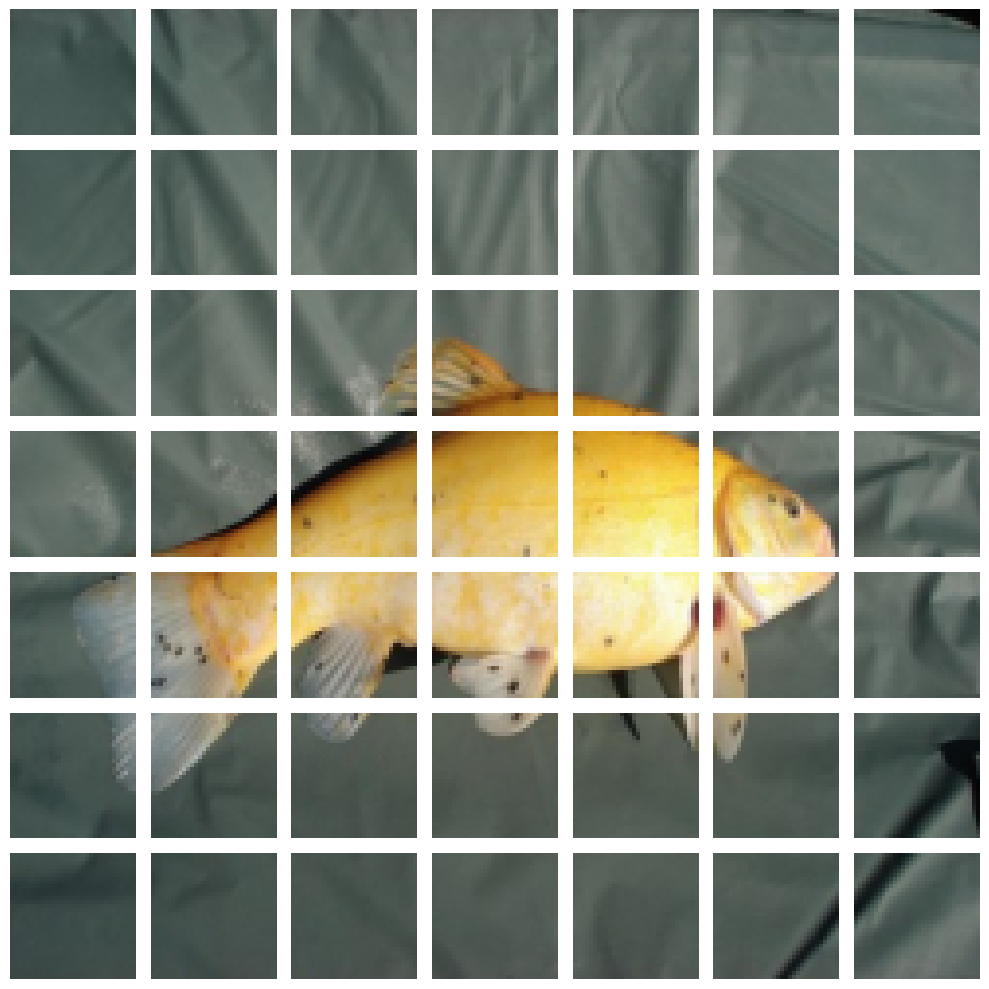

Image: D:\image_folder\Images\Example_Image_10.jpg


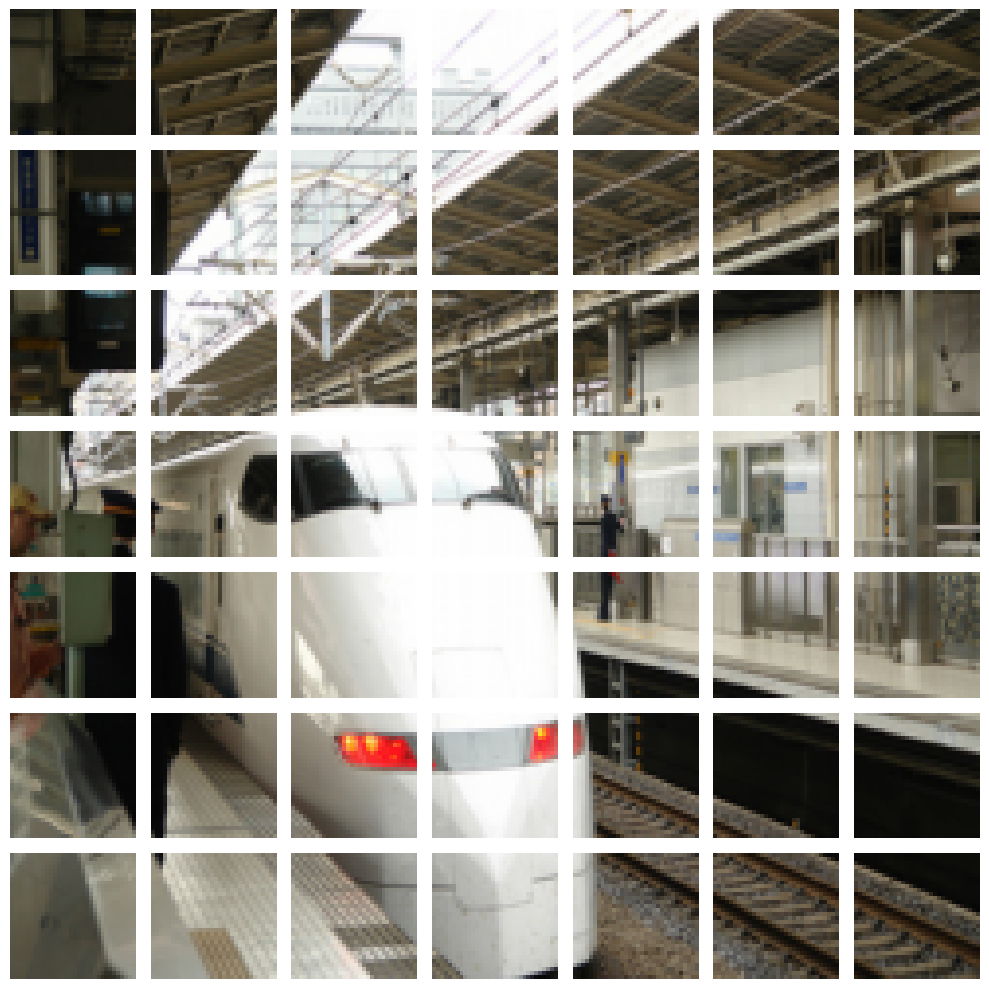

Image: D:\image_folder\Images\Example_Image_2.jpg


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.36962068..1.0000001].


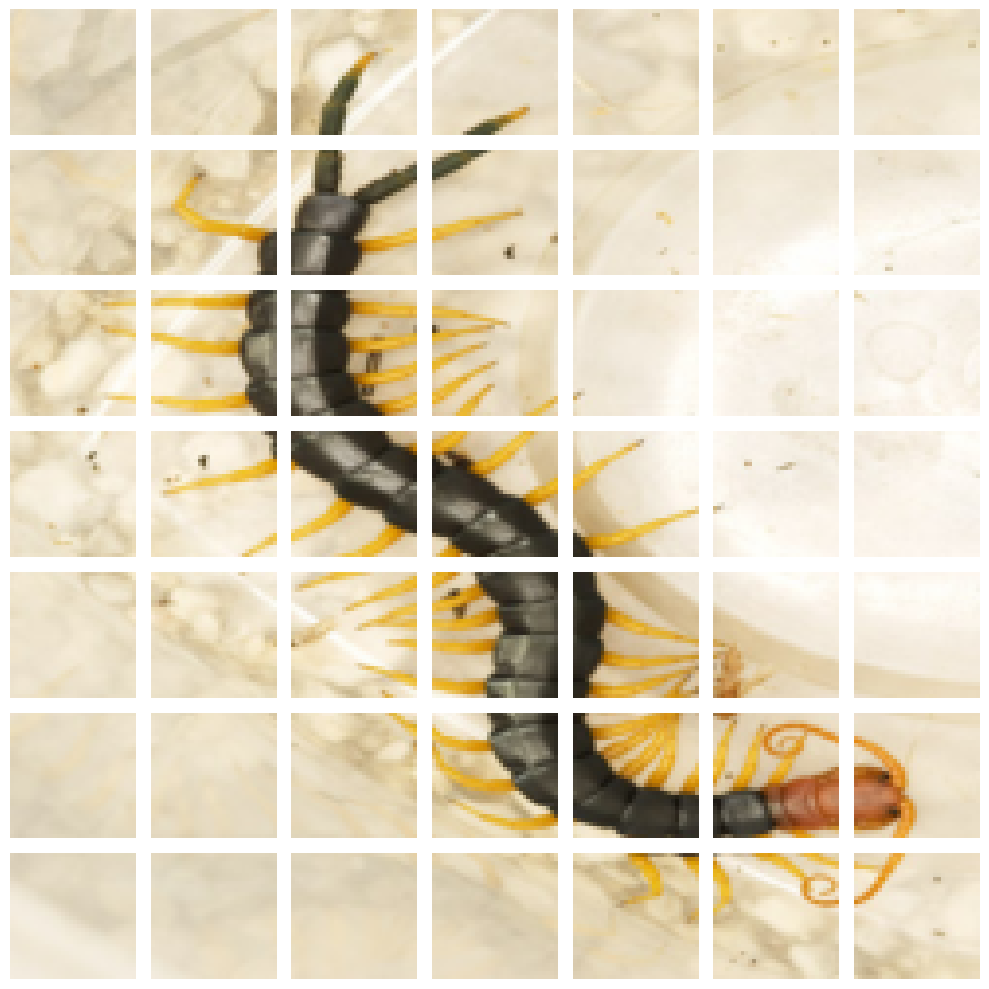

Image: D:\image_folder\Images\Example_Image_3.jpg


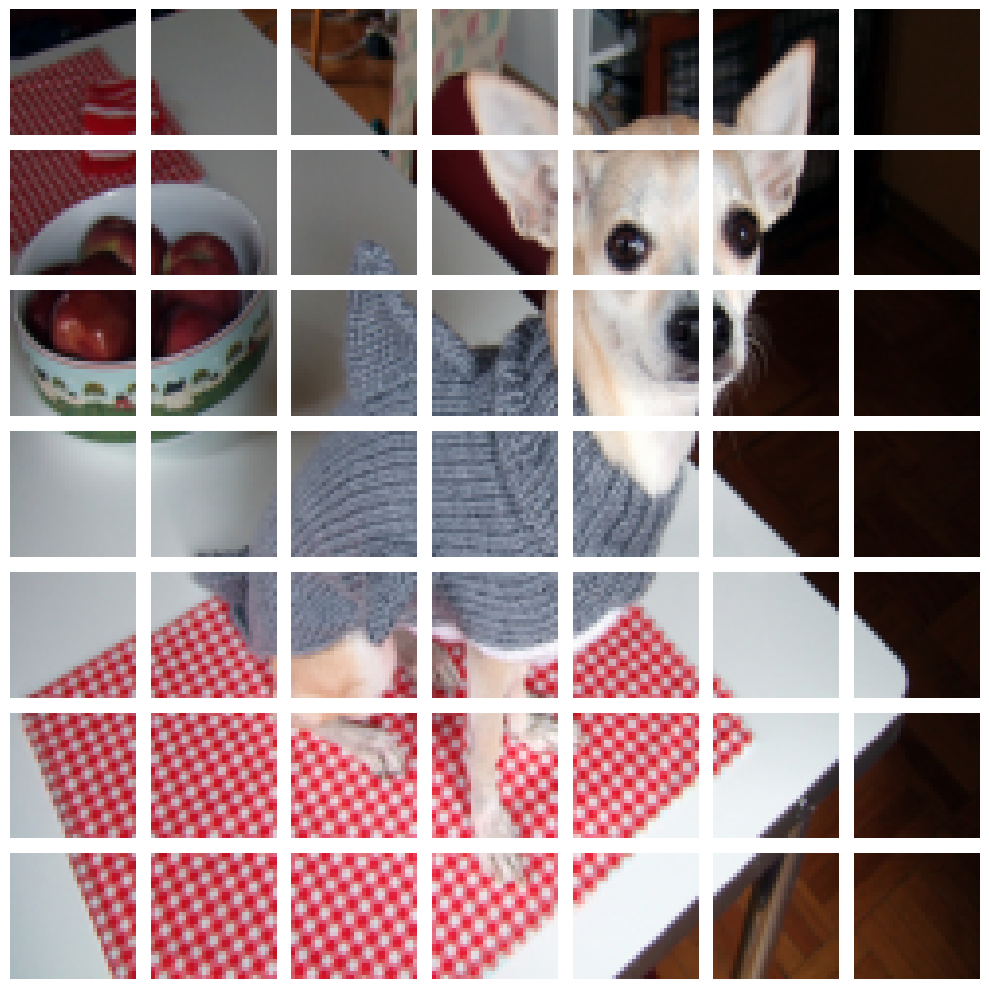

Image: D:\image_folder\Images\Example_Image_4.jpg


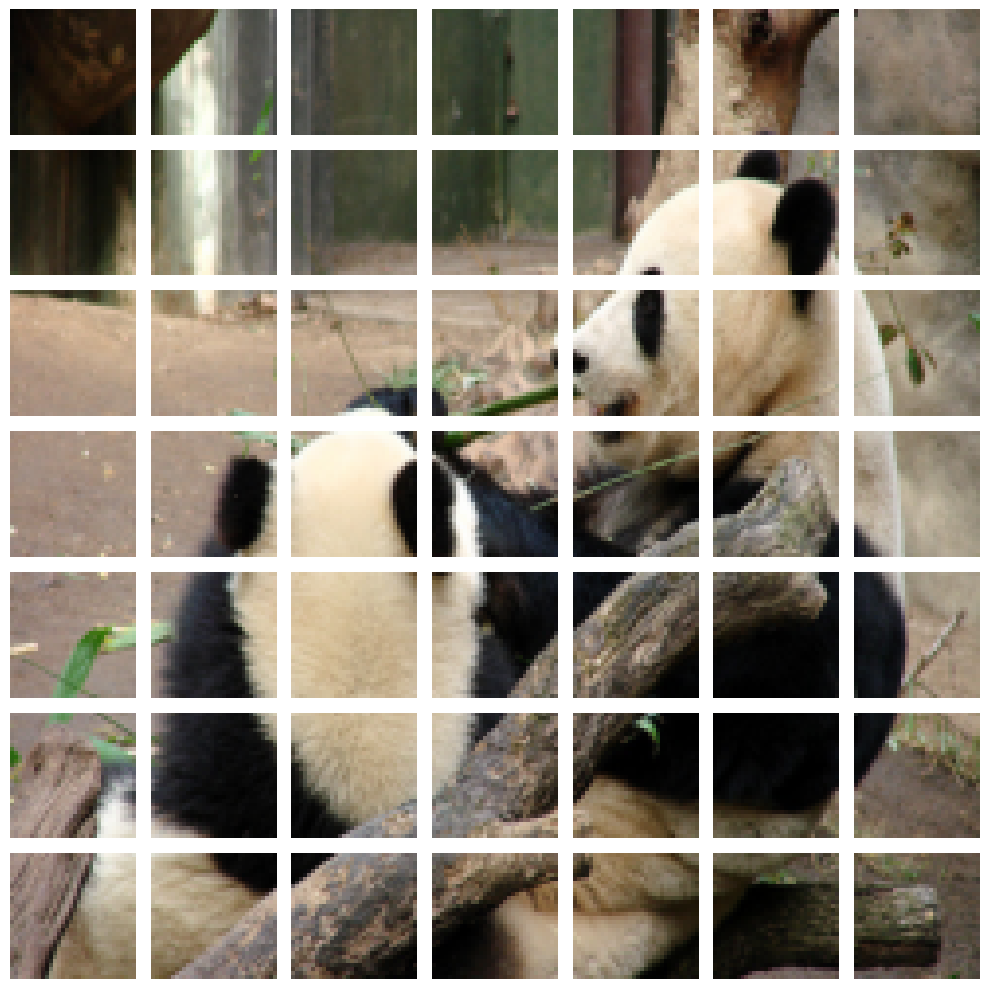

Image: D:\image_folder\Images\Example_Image_5.jpg


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.9951863..1.0000001].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.38848835..1.0000001].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.030670354..1.0000001].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.46224883..1.0000001].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.046629097..1.0000002].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.022399615..1.0000001].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.

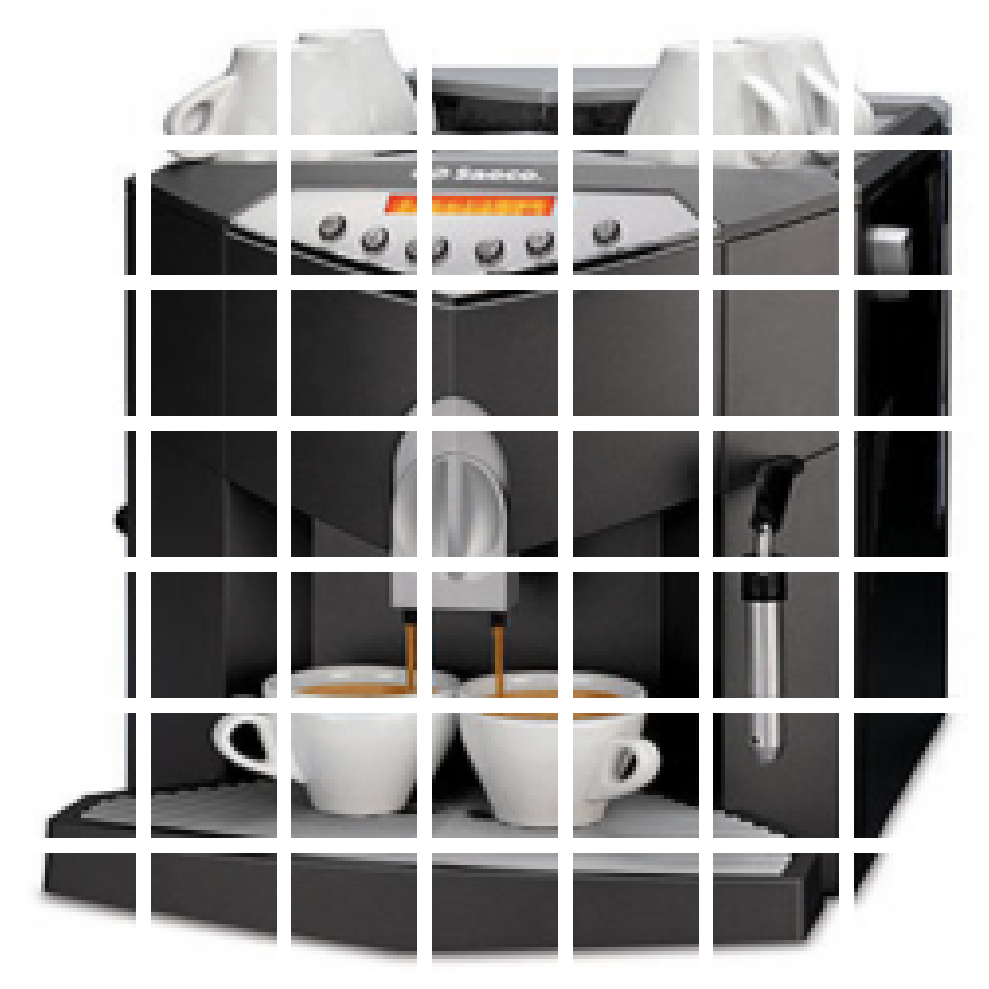

Image: D:\image_folder\Images\Example_Image_6.jpg


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.06942532..1.0000002].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.002827345..1.0000002].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0042800005..1.0000002].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.010601515..1.0000002].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0023174025..1.0000002].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.005532125..1.0000001].


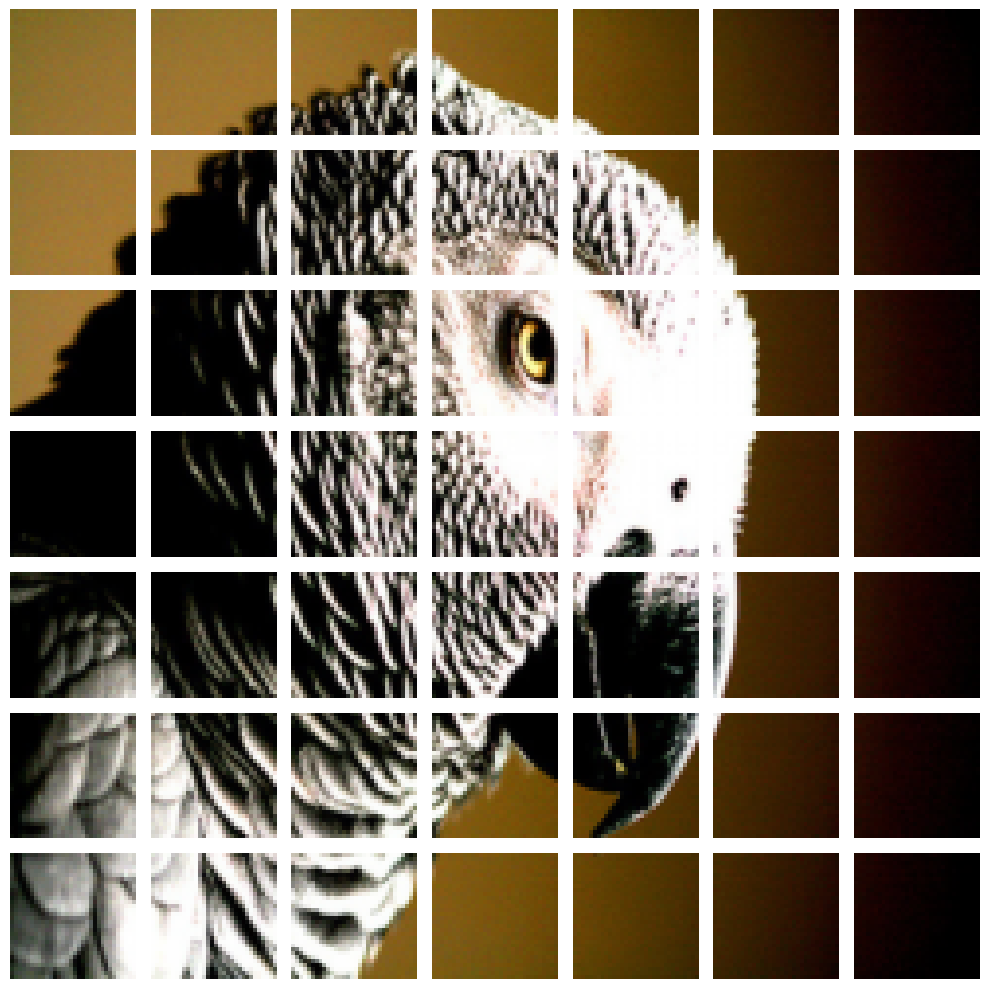

Image: D:\image_folder\Images\Example_Image_7.jpg


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.004688371..1.0000001].


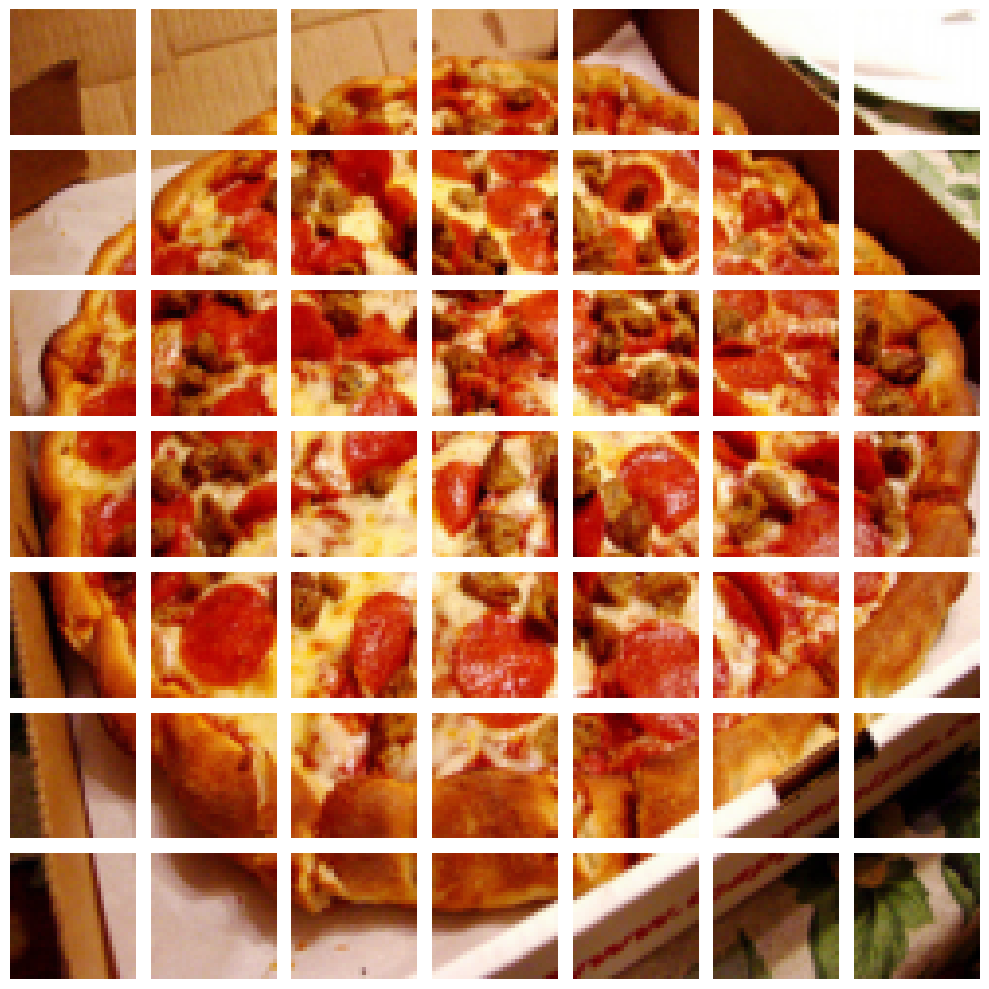

Image: D:\image_folder\Images\Example_Image_8.jpg


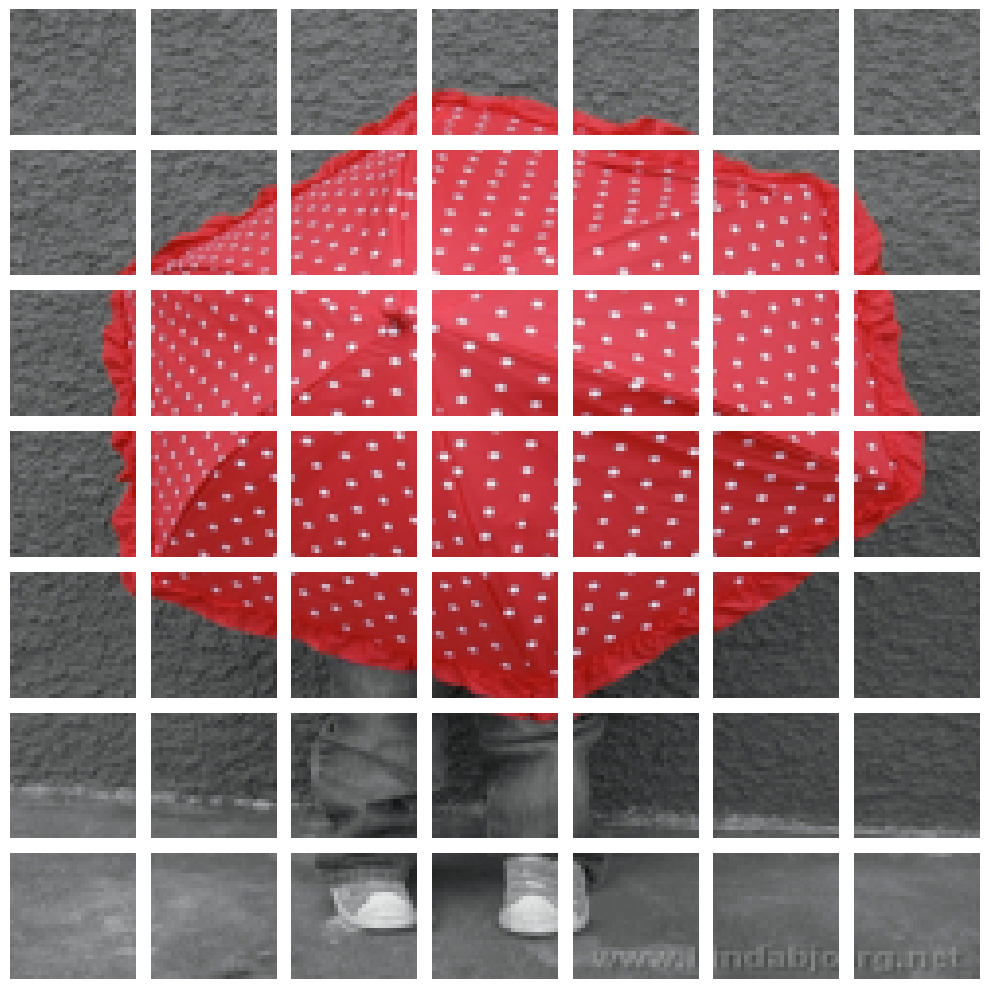

Image: D:\image_folder\Images\Example_Image_9.jpg


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0831488..1.0000001].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.4674185..1.0000001].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.39826077..1.0000001].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.10497761..1.0000001].


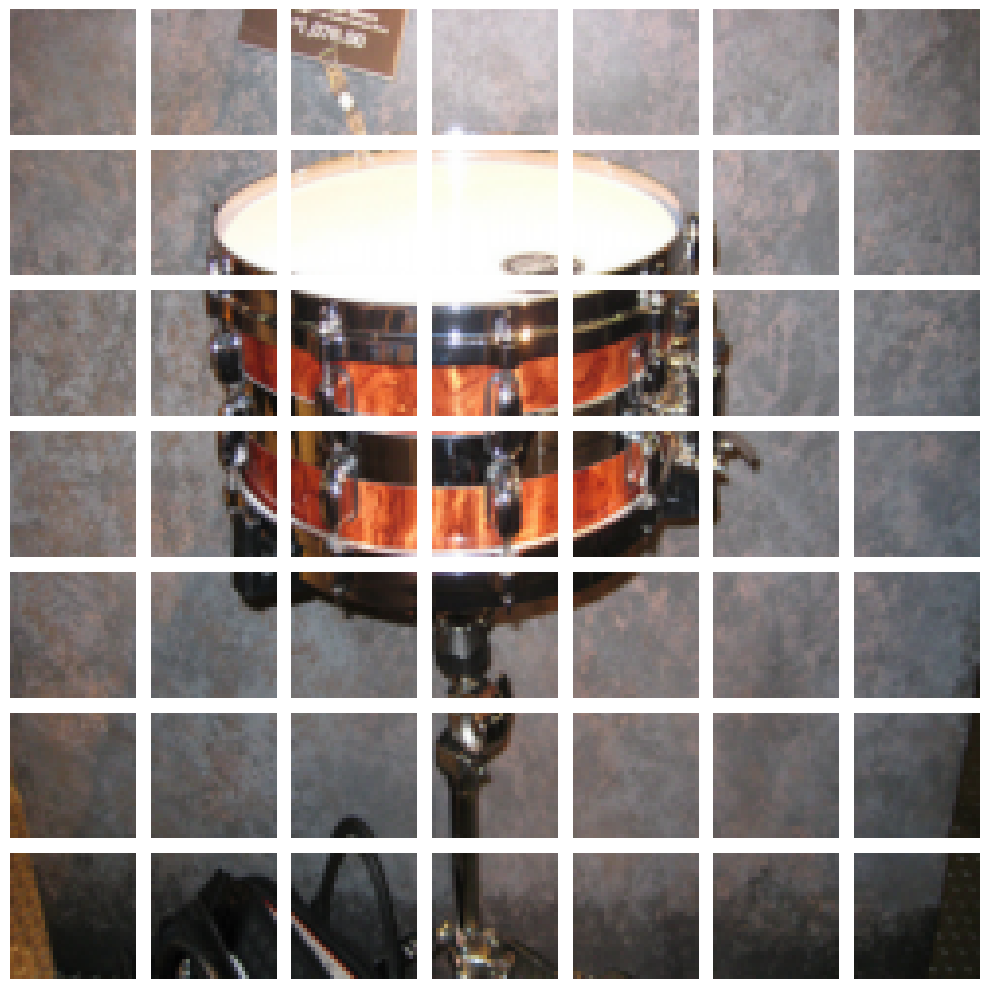

In [32]:
print_patches_from_dict(all_patches)